Análise das variaveis, são 10 variaveis, neste jupyter vamos fazer a regressão de todas as variaveis, comparando uma com as outras, para saber a importancia, o lance de rejeitar a hipotese nula, o r quadrado o onibus...

## Regressão Linear

Importando as bilbiotecas:

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import probplot, norm
import matplotlib.pyplot as plt

Abrindo o dataset.

In [2]:
dados = pd.read_csv('featuresdf1.csv')
dados.head()

,Unnamed: 0,id,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.000000,0.1670,0.811,80.924


Definindo a função de regressão.

In [3]:
def regre(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()
    return result

# ANÁLISE DAS VARIÁVEIS

Com o dataset definido, e a partir da análise exploratória, verificamos a relação existente entre cada uma das variáveis.

### Primeira variável a ser analisada: energy

In [4]:
quant1 = ['danceability','speechiness', 'instrumentalness', 'liveness', 'valence', 'loudness','key','acousticness']

In [5]:
quant1_x = quant1.copy()

In [6]:
re1 = regre(dados.loc[:, quant1], dados.energy)
re1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     199.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.31e-54
Time:                        12:42:18   Log-Likelihood:                 42.759
No. Observations:                 100   AIC:                            -69.52
Df Residuals:                      92   BIC:                            -48.68
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         0.5795      0.116      4.998      0.000       0.349       0.810
speechiness         -0.0746      0.198     -0.377      0.707      -0.467       0.318
instrumentalness     0.9922      0.646      1.536      0.128      -0.290       2.275
liveness             0.6981      0.201      3.475      0.001       0.299       1.097
valence              0.2525      0.093      2.706      0.008       0.067       0.438
loudness             0.0070      0.010      0.695      0.489      -0.013       0.027
key                  0.0115      0.004      2.653      0.009       0.003       0.020
acousticness        -0.1062      0.106     -1.005      0.317      -0.316       0.104
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.664
Skew:                           0.044   Prob(JB):                        0.717
Kurtosis:                       2.611   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

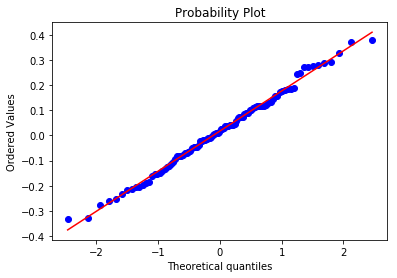

In [8]:
probplot(re1.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'energy', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Como o p value da variável 'tempo' é um valor muito alto, chegamos à hipótese de que talvez não tenha tanta relevância se comparado à variável 'energy', e, assim, pode ser descartado. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, e, como obtivemos um bom índice do R-squared (59%), podemos dizer que a variável 'energy' é fortemente relacionada com as demais.

### Segunda variavel a ser analisada: danceability - R2 ALTO, PVALUE ALTO

In [17]:
quant2 = ['speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy']

In [18]:
quant2_x = quant2.copy()

In [19]:
re2 = regre(dados.loc[:, quant2], dados.danceability)
re2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     312.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.32e-64
Time:                        12:45:11   Log-Likelihood:                 65.726
No. Observations:                 100   AIC:                            -113.5
Df Residuals:                      91   BIC:                            -90.00
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
speechiness          0.0549      0.158      0.347      0.730      -0.260       0.369
instrumentalness    -0.2084      0.523     -0.399      0.691      -1.247       0.830
liveness             0.0385      0.171      0.226      0.822      -0.301       0.378
valence              0.3723      0.067      5.535      0.000       0.239       0.506
tempo               -0.0004      0.000     -0.773      0.441      -0.001       0.001
loudness            -0.0476      0.008     -5.970      0.000      -0.063      -0.032
key                 -0.0016      0.004     -0.436      0.664      -0.009       0.006
acousticness        -0.0012      0.086     -0.014      0.989      -0.171       0.169
energy               0.4138      0.094      4.389      0.000       0.227       0.601
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.451
Skew:                          -0.143   Prob(JB):                        0.108
Kurtosis:                       3.993   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

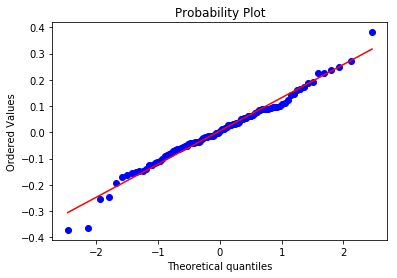

In [20]:
probplot(re2.resid, dist='norm', plot=plt);

### Terceira variavel a ser analisada: speechiness - TIRAR

In [50]:
quant3 = [ 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability']

In [51]:
quant3_x = quant3.copy()

In [52]:
re3 = regre(dados.loc[:, quant3], dados.speechiness)
re3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            speechiness   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     18.89
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.25e-17
Time:                        12:54:59   Log-Likelihood:                 106.99
No. Observations:                 100   AIC:                            -196.0
Df Residuals:                      91   BIC:                            -172.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
instrumentalness    -0.4284      0.343     -1.248      0.215      -1.110       0.254
liveness            -0.0615      0.113     -0.545      0.587      -0.286       0.163
valence              0.0137      0.051      0.266      0.791      -0.089       0.116
tempo                0.0001      0.000      0.438      0.663      -0.001       0.001
loudness            -0.0201      0.006     -3.443      0.001      -0.032      -0.009
key                  0.0006      0.002      0.254      0.800      -0.004       0.005
acousticness        -0.0935      0.056     -1.675      0.097      -0.204       0.017
energy              -0.0386      0.069     -0.562      0.575      -0.175       0.098
danceability         0.0240      0.069      0.347      0.730      -0.114       0.162
==============================================================================
Omnibus:                       15.105   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.829
Skew:                           0.962   Prob(JB):                     0.000222
Kurtosis:                       3.581   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

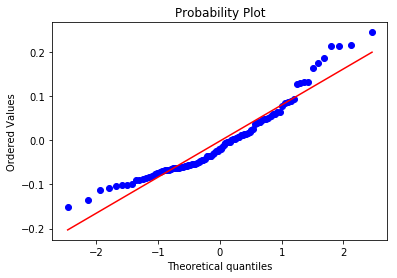

In [53]:
probplot(re3.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'speechiness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value estão um pouo altos, o que indica que talvez não tenha uma forte relação com as outras variáveis. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, salvo alguns outliers. Além disso, obtivemos um bom índice do R-squared (65%), porém, não podemos afirmar que a variável 'speechiness' é fortemente relacionada com as demais.

### Quarta variavel a ser analisada: instrumentalness - NÃO É RELEVANTE

In [ ]:
quant4 = [ 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness']

In [ ]:
quant4_x = quant4.copy()

In [ ]:
re = regre(dados.loc[:, quant4], dados.instrumentalness)
re.summary()

In [ ]:
probplot(dados.instrumentalness, dist='norm', plot=plt);

### Quinta variavel a ser analisada: liveness - NÃO É RELEVANTE

In [ ]:
quant5 = [ 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'instrumentalness']

In [ ]:
quant5_x = quant5.copy()

In [ ]:
re = regre(dados.loc[:, quant5], dados.liveness)
re.summary()

In [ ]:
probplot(dados.liveness, dist='norm', plot=plt);

### Sexta variavel a ser analisada: valence - BOM

In [ ]:
quant6 = [ 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness']

In [ ]:
quant6_x = quant6.copy()

In [ ]:
re = regre(dados.loc[:, quant6], dados.valence)
re.summary()

In [ ]:
probplot(dados.valence, dist='norm', plot=plt);

### Setima variavel a ser analisada: tempo - MAIS OU MENOS

In [ ]:
quant7 = [ 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence']

In [ ]:
quant7_x = quant7.copy()

In [ ]:
re = regre(dados.loc[:, quant7], dados.tempo)
re.summary()

In [ ]:
probplot(dados.tempo, dist='norm', plot=plt);

### Oitava variavel a ser analisada:  - R2 ALTO, ONIBUS BAIXO, MAS BOM

In [ ]:
quant8 = [ 'key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo']

In [ ]:
quant8_x = quant8.copy()

In [ ]:
re = regre(dados.loc[:, quant8], dados.loudness)
re.summary()

In [ ]:
probplot(dados.loudness, dist='norm', plot=plt);

### Nona variavel a ser analisada: key - TIRAR

In [ ]:
quant9 = [ 'acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness']

In [ ]:
quant9_x = quant9.copy()

In [ ]:
re = regre(dados.loc[:, quant9], dados.key)
re.summary()

In [ ]:
probplot(dados.key, dist='norm', plot=plt);

### Decima variavel a ser analisada: acousticness - MEIO RUIM, R2 BAIXO

In [ ]:
quant = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key']

In [ ]:
quant_x = quant.copy()

In [ ]:
re = regre(dados.loc[:, quant], dados.acousticness)
re.summary()

In [ ]:
probplot(dados.acousticness, dist='norm', plot=plt);

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df

In [ ]:
top10 = []
for i in range(50):
    if i < 10:
        top10.append(1)
    else:
        top10.append(0)


In [ ]:
quantitativas = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key', 'instrumentalness']

In [ ]:
resultado = regre(df.loc[:, quantitativas], top10)
resultado.summary()

In [ ]:
probplot(resultado.resid, dist='norm', plot=plt);